In [287]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [288]:
xx = np.load('result.npy')

In [289]:
np.mean(xx,(1,2))

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.77464306e-01,   0.00000000e+00,   2.11987761e-04,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.22250855e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00], dtype=float32)

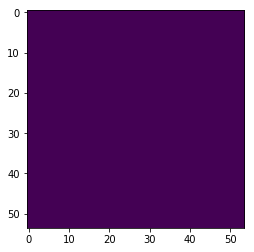

In [290]:
plt.imshow(xx[18])

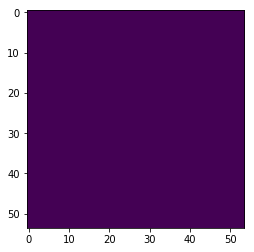

In [273]:
plt.imshow(xx[0])

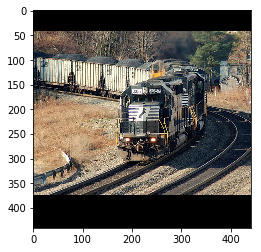

In [274]:
plt.imshow(cv2.imread('image.png'))

/usr/lib64/python2.7/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib64/python2.7/site-packages/numpy/core/_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


/usr/lib64/python2.7/site-packages/matplotlib/colors.py:823: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/usr/lib64/python2.7/site-packages/numpy/ma/core.py:2809: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


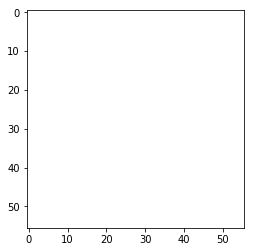

In [253]:
plt.imshow(np.mean(xx[27:51],0))

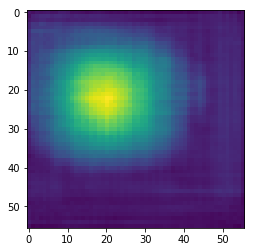

In [245]:
plt.imshow(np.mean(xx[51:81],0))

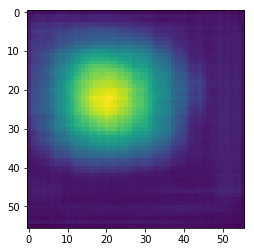

In [246]:
plt.imshow(np.mean(xx[81:100],0))

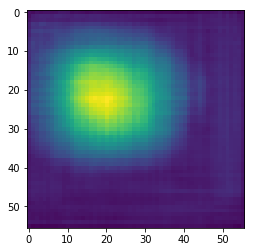

In [247]:
plt.imshow(np.mean(xx[100:119],0))

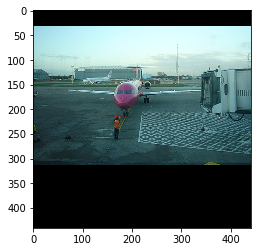

In [260]:
plt.imshow(cv2.imread('image.png'))

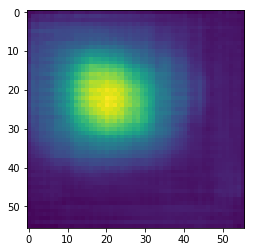

In [249]:
plt.imshow(np.mean(xx[208:223],0))

In [257]:
bill = np.mean(xx[0:27],0,keepdims=True)
wing = np.mean(xx[27:51],0,keepdims=True)
upperparts = np.mean(xx[51:81],0,keepdims=True)
breast = np.mean(xx[81:100],0,keepdims=True) #19
back = np.mean(xx[100:119],0,keepdims=True) #19
tail = np.mean(xx[119:159],0,keepdims=True) #40
head = np.mean(xx[159:170],0,keepdims=True) #11
throat = np.mean(xx[170:185],0,keepdims=True) #15
eye = np.mean(xx[185:208],0,keepdims=True) #23
forehead = np.mean(xx[208:223],0,keepdims=True) #15
nape = np.mean(xx[223:238],0,keepdims=True) #15
belly = np.mean(xx[238:257],0,keepdims=True) #19
leg = np.mean(xx[257:272],0,keepdims=True) #15
crown = np.mean(xx[272:287],0,keepdims=True) #15

In [260]:
bill = np.max(xx[0:27],0,keepdims=True)
wing = np.max(xx[27:51],0,keepdims=True)
upperparts = np.max(xx[51:81],0,keepdims=True)
breast = np.max(xx[81:100],0,keepdims=True) #19
back = np.max(xx[100:119],0,keepdims=True) #19
tail = np.max(xx[119:159],0,keepdims=True) #40
head = np.max(xx[159:170],0,keepdims=True) #11
throat = np.max(xx[170:185],0,keepdims=True) #15
eye = np.max(xx[185:208],0,keepdims=True) #23
forehead = np.max(xx[208:223],0,keepdims=True) #15
nape = np.max(xx[223:238],0,keepdims=True) #15
belly = np.max(xx[238:257],0,keepdims=True) #19
leg = np.max(xx[257:272],0,keepdims=True) #15
crown = np.max(xx[272:287],0,keepdims=True) #15

In [261]:
seg = np.concatenate((bill, wing, upperparts, breast, back, tail, head, throat, eye, forehead, nape, belly, leg, crown))
seg = np.argmax(cv2.resize(np.transpose(seg, (1,2,0)), (441,441)),axis=2)


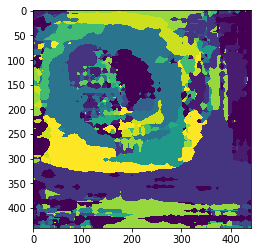

In [262]:
plt.imshow(seg*20)

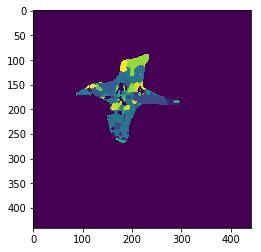

In [238]:
label = cv2.imread('gray.png',-1)
plt.imshow(seg*20*label)

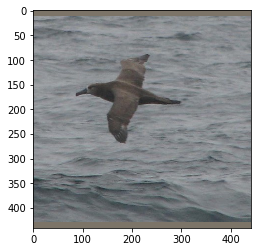

In [263]:
plt.imshow(cv2.imread('image.png'))

In [63]:
cam_list = np.concatenate((bill, wing, upperparts, breast, back, tail, head, throat, eye, forehead, nape, belly, leg, crown))
norm_cam = cam_list / (np.max(cam_list, (1, 2), keepdims=True) + 1e-5)

In [69]:
norm_cam.shape

(287, 56, 56)

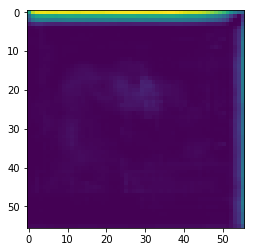

In [65]:
plt.imshow(norm_cam[0])

In [256]:
xx = np.load('result.npy')
xx = xx / (np.max(xx, (1, 2), keepdims=True) + 1e-5)

In [175]:
xx

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.21036039,  0.39900461,  0.33216   , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.25635585,  0.4825632 ,  0.27407476, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.24399132,  0.28868964,  0.22497711, ...,  0.        ,
          0.        ,  0.        ],
        ..., 
        [ 0.        ,  0.        ,  0.03172742, ...,

In [268]:
import multiprocessing as mp

NCORE = 10

def process(q, iolock):
    from time import sleep
    while True:
        stuff = q.get()
        if stuff is None:
            break
        with iolock:
            print("processing", stuff)
        sleep(stuff)

if __name__ == '__main__':
    q = mp.Queue(maxsize=NCORE)
    iolock = mp.Lock()
    pool = mp.Pool(NCORE, initializer=process, initargs=(q, iolock))
    for stuff in range(20):
        q.put(stuff)  # blocks until q below its max size
        with iolock:
            print("queued", stuff)
    for _ in range(NCORE):  # tell workers we're done
        q.put(None)
    pool.close()
    pool.join()

('processing', 0)
('processing', 1)
('queued', 0)
('queued', 1)
('queued', 2)
('queued', 3)
('queued', 4)
('queued', 5)
('queued', 6)
('queued', 7)
('queued', 8)
('queued', 9)
('queued', 10)
('queued', 11)
('processing', 2)
('processing', 3)
('processing', 4)
('processing', 5)
('processing', 6)
('processing', 7)
('processing', 8)
('processing', 9)
('processing', 10)
('queued', 12)
('queued', 13)
('queued', 14)
('queued', 15)
('queued', 16)
('queued', 17)
('queued', 18)
('queued', 19)
('processing', 11)
('processing', 12)
('processing', 13)
('processing', 14)
('processing', 15)
('processing', 16)
('processing', 17)
('processing', 18)
('processing', 19)


In [238]:
class Solution:
    def reOrderArray(self, array):
        length = len(array)
        if length < 2:
            return array
        head = 0
        tail = 0
        while tail < length-1 and head< length-1:
            while array[head] % 2 ==1 and head< length-1:
                head += 1
            tail = head + 1
            while array[tail] % 2 ==0 and tail< length-1:
                tail += 1
            if tail == length-1 and array[tail] % 2 ==0:
                break
            if head < tail:
                print(head,tail)
                temp = array[tail]
                array[head+1:tail+1] = array[head:tail]
                array[head] = temp
                head = head+1
        return array

In [239]:
'12e'.split('e')

['12', '']

In [240]:
a = Solution()
a.reOrderArray([1,3,5,7,2,4,6])
#a.reOrderArray([1,2,3,4,5,6,7])

[1, 3, 5, 7, 2, 4, 6]

In [234]:
# -*- coding:utf-8 -*-
class Solution:
    # s字符串
    def isNumeric(self, s):
        if sum(1 for item in s if item == '.') > 1:
            return 0
        if sum(1 for item in s if item == 'e' or item == 'E') > 1:
            return 0
        if 
        if len(s.split('.')) ==2 and len(s.split('e')) ==2:
            return interic(s.split('.')[0]) and interic(s.split('.')[1].split('e')[0]) and interic(s.split('.')[1].split('e')[1])
        if len(s.split('.')) ==2 and len(s.split('E')) ==2:
            return interic(s.split('.')[0]) and interic(s.split('.')[1].split('E')[0]) and interic(s.split('.')[1].split('E')[1])
        if len(s.split('.')) ==2:
            return interic(s.split('.')[0]) and interic(s.split('.')[1])
        if len(s.split('e')) ==2:
            return interic(s.split('e')[0]) and interic(s.split('e')[1])
        if len(s.split('E')) ==2:
            return interic(s.split('E')[0]) and interic(s.split('E')[1])
        return interic(s.remove('.'))
    
def interic(s):
    if s[0] in '-+':
        s = s[1:]
    if not s:
        return 1
    for item in s:
        if item not in '1234567890':
            return 0
    return 1

SyntaxError: invalid syntax (<ipython-input-234-624dd5ea3c8c>, line 9)

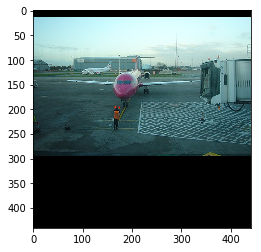

In [241]:
plt.imshow()

In [244]:
img1 = cv2.imread('image.png')
detector = cv2.ORB()
kp1 = detector.detect(img1,None)

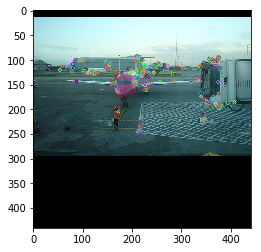

In [245]:
aaa=cv2.drawKeypoints(img1,kp1,img1)
plt.imshow(img1)